In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!unzip -d "/content/drive/MyDrive/word_embeddings" "/content/drive/MyDrive/word_embeddings.zip"

In [4]:
#!pip install eli5a

In [5]:
import os 
os.chdir("/content/Hope_speech/Models")

In [13]:
from embeddings_loader import *
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
#import eli5

In [7]:
path = "/content/drive/MyDrive/word_embeddings/computed_embeddings"

In [8]:
train_labels, dev_labels, test_labels = load_labels(path)

In [9]:
def computeAllScores(y_pred_train, y_pred_dev, y_pred_test):
    print("Accuracy Train: ", accuracy_score(train_labels, y_pred_train))
    print("Accuracy Dev: ", accuracy_score(dev_labels, y_pred_dev))
    print("Accuracy Test: ", accuracy_score(test_labels, y_pred_test))
    print("F1 Train: ", f1_score(train_labels, y_pred_train, average='macro'))
    print("F1 Dev: ", f1_score(dev_labels, y_pred_dev, average='macro'))
    print("F1 Test: ", f1_score(test_labels, y_pred_test, average='macro'))
    print("Precision Train: ", precision_score(train_labels, y_pred_train, average='macro'))
    print("Precision Dev: ", precision_score(dev_labels, y_pred_dev, average='macro'))
    print("Precision Test: ", precision_score(test_labels, y_pred_test, average='macro'))
    print("Recall Train: ", recall_score(train_labels, y_pred_train, average='macro'))
    print("Recall Dev: ", recall_score(dev_labels, y_pred_dev, average='macro'))
    print("Recall Test: ", recall_score(test_labels, y_pred_test, average='macro'))
    # Confusion Matrix
    print("Confusion Matrix Train: ")
    print(confusion_matrix(train_labels, y_pred_train))
    print("Confusion Matrix Dev: ")
    print(confusion_matrix(dev_labels, y_pred_dev))
    print("Confusion Matrix Test: ")
    print(confusion_matrix(test_labels, y_pred_test))

In [10]:
label_replacement = {
    'Hope_speech': 0,
    'Non_hope_speech': 1,
    'not-English': 2,
}

In [11]:
# Replace labels with numbers
train_labels = [label_replacement[label] for label in train_labels]
dev_labels = [label_replacement[label] for label in dev_labels]
test_labels = [label_replacement[label] for label in test_labels]

### Glove Twitter 25

In [12]:
gt25_train, gt25_dev, gt25_test = load_glove_twitter_25(path)

In [14]:
# Set all NaN values to 0
gt25_train = np.nan_to_num(gt25_train)
gt25_dev = np.nan_to_num(gt25_dev)
gt25_test = np.nan_to_num(gt25_test)

In [15]:
gt25_train.shape

(22762, 25)

In [16]:
xgboost = XGBClassifier(n_estimators = 100).fit(gt25_train, train_labels)

In [17]:
train_preds = xgboost.predict(gt25_train)
dev_preds = xgboost.predict(gt25_dev)
test_preds = xgboost.predict(gt25_test)

In [18]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9154292241455056
Accuracy Dev:  0.9050298979950756
Accuracy Test:  0.9139142656359803
F1 Train:  0.4424063552354185
F1 Dev:  0.3332213005777564
F1 Test:  0.34373041024263284
Precision Train:  0.9274140692736116
Precision Dev:  0.5352512060242381
Precision Test:  0.5825296008782247
Recall Train:  0.4048221210926825
Recall Dev:  0.3415225081858357
Recall Test:  0.34640956421133823
Confusion Matrix Train: 
[[   65  1897     0]
 [   10 20768     0]
 [    0    18     4]]
Confusion Matrix Dev: 
[[   7  265    0]
 [   3 2566    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  10  240    0]
 [   2 2591    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### FastText 300 

In [19]:
ft300_train, ft300_dev, ft300_test = load_fasttext_300(path)

In [20]:
# Set all NaN values to 0
ft300_train = np.nan_to_num(ft300_train)
ft300_dev = np.nan_to_num(ft300_dev)
ft300_test = np.nan_to_num(ft300_test)

In [21]:
ft300_train.shape

(22762, 300)

In [22]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100).fit(ft300_train, train_labels)

In [23]:
train_preds = xgboost.predict(ft300_train)
dev_preds = xgboost.predict(ft300_dev)
test_preds = xgboost.predict(ft300_test)

In [24]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9204815042614884
Accuracy Dev:  0.9099542736545903
Accuracy Test:  0.9191848208011244
F1 Train:  0.5398188630653988
F1 Dev:  0.3722966803626166
F1 Test:  0.379335754302735
Precision Train:  0.9317839806372707
Precision Dev:  0.5642231412308787
Precision Test:  0.6150153937785485
Recall Train:  0.47207420607214495
Recall Dev:  0.36306232302185176
Recall Test:  0.36640956421133825
Confusion Matrix Train: 
[[  195  1767     0]
 [   28 20750     0]
 [    0    15     7]]
Confusion Matrix Dev: 
[[  25  247    0]
 [   7 2562    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  25  225    0]
 [   2 2591    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Word2Vec 300

In [25]:
w2v300_train, w2v300_dev, w2v300_test = load_word2vec_300(path)

In [26]:
# Set all NaN values to 0
w2v300_train = np.nan_to_num(w2v300_train)
w2v300_dev = np.nan_to_num(w2v300_dev)
w2v300_test = np.nan_to_num(w2v300_test)

In [27]:
w2v300_train.shape

(22762, 300)

In [28]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators= 100).fit(w2v300_train, train_labels)

In [29]:
train_preds = xgboost.predict(w2v300_train)
dev_preds = xgboost.predict(w2v300_dev)
test_preds = xgboost.predict(w2v300_test)

In [30]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9238204024250944
Accuracy Dev:  0.911712979247274
Accuracy Test:  0.9198875614898102
F1 Train:  0.5610127688808825
F1 Dev:  0.3842139521393239
F1 Test:  0.39485541927836326
Precision Train:  0.9425738221446657
Precision Dev:  0.5694032944389578
Precision Test:  0.5754822254104894
Recall Train:  0.4851400526916532
Recall Dev:  0.3702855120249735
Recall Test:  0.3763049235120195
Confusion Matrix Train: 
[[  272  1690     0]
 [   29 20749     0]
 [    0    15     7]]
Confusion Matrix Dev: 
[[  31  241    0]
 [   8 2561    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  33  217    0]
 [   8 2585    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### TF-IDF PCA (1000 Dims)

In [31]:
tfidf_pca_train, tfidf_pca_dev, tfidf_pca_test = load_tfidf_pca(path)

In [32]:
tfidf_pca_train.shape

(22762, 1000)

In [33]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100).fit(tfidf_pca_train, train_labels)

In [34]:
features = np.array([f"pc{i}" for i in range(1, 1001)])

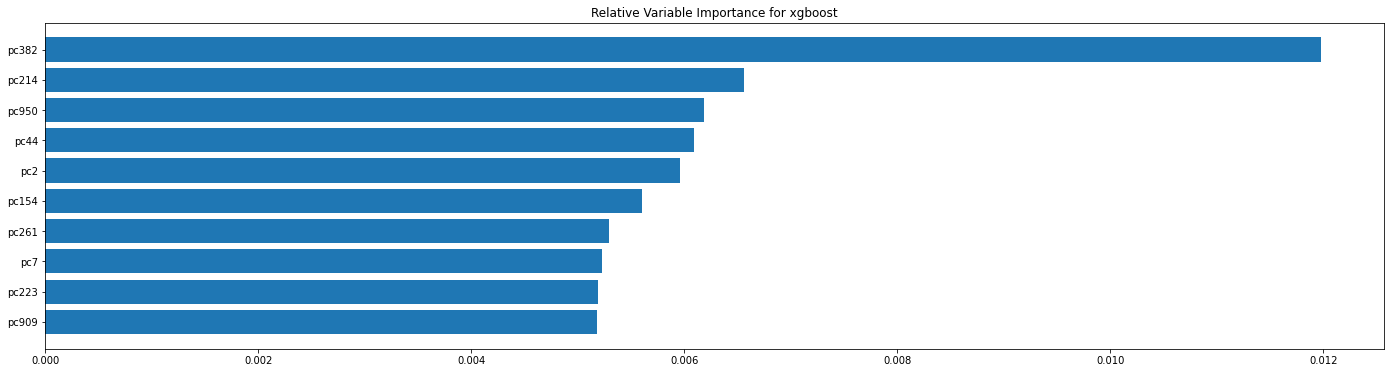

In [35]:
X = features[np.flip(np.argsort(xgboost.feature_importances_))]
fig, axs = plt.subplots(1,1, figsize=(24,6))
models = {'xgboost': xgboost} 
num_features = 10 
for i, (name, model) in enumerate(models.items()):
    importances = model.feature_importances_
    order = np.argsort(importances)[-num_features:]
    axs.barh(range(num_features), importances[order], tick_label=X[order]);
    axs.set_title(f"Relative Variable Importance for {name}")

In [36]:
train_preds = xgboost.predict(tfidf_pca_train)
dev_preds = xgboost.predict(tfidf_pca_dev)
test_preds = xgboost.predict(tfidf_pca_test)

In [37]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9280818908707495
Accuracy Dev:  0.9124164614843475
Accuracy Test:  0.9184820801124385
F1 Train:  0.5074011216304978
F1 Dev:  0.4009138407135904
F1 Test:  0.3900265127256415
Precision Train:  0.946622015851589
Precision Dev:  0.5452219325533264
Precision Test:  0.5589843919829572
Recall Train:  0.4429241697307515
Recall Dev:  0.38150239659896656
Recall Test:  0.37338115439002445
Confusion Matrix Train: 
[[  381  1581     0]
 [   37 20741     0]
 [    0    19     3]]
Confusion Matrix Dev: 
[[  41  231    0]
 [  16 2553    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  31  219    0]
 [  10 2583    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sentence Transformer Faster No PCA

In [38]:
train, dev, test = load_sent_trans_fast_no_pca(path)

In [39]:
train.shape

(22762, 384)

In [40]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(train, train_labels)

In [41]:
train_preds = xgboost.predict(train)
dev_preds = xgboost.predict(dev)
test_preds = xgboost.predict(test)

In [42]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9340567612687813
Accuracy Dev:  0.9166373549067885
Accuracy Test:  0.9262122276879832
F1 Train:  0.6331122495357323
F1 Dev:  0.44065641768677044
F1 Test:  0.44762218046859464
Precision Train:  0.9187186996974792
Precision Dev:  0.5372652668571036
Precision Test:  0.5614959058596275
Recall Train:  0.5411876797150211
Recall Dev:  0.41264434929285065
Recall Test:  0.415967090885718
Confusion Matrix Train: 
[[  612  1350     0]
 [  136 20642     0]
 [    0    15     7]]
Confusion Matrix Dev: 
[[  68  204    0]
 [  31 2538    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  64  186    0]
 [  21 2572    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sentence Transformer Faster PCA

In [43]:
train, dev, test = load_sent_trans_fast_pca(path)

In [44]:
train.shape

(22762, 251)

In [45]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100).fit(train, train_labels)

In [46]:
train_preds = xgboost.predict(train)
dev_preds = xgboost.predict(dev)
test_preds = xgboost.predict(test)

In [47]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9324751779281258
Accuracy Dev:  0.9173408371438622
Accuracy Test:  0.9241040056219255
F1 Train:  0.5640985977282761
F1 Dev:  0.43318788064598257
F1 Test:  0.442531259286858
Precision Train:  0.9238172556049394
Precision Dev:  0.5525886153308888
Precision Test:  0.5478052323361093
Recall Train:  0.48581875273347647
Recall Dev:  0.4052336874804418
Recall Test:  0.4127862193083944
Confusion Matrix Train: 
[[  551  1411     0]
 [  108 20670     0]
 [    0    18     4]]
Confusion Matrix Dev: 
[[  61  211    0]
 [  22 2547    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  62  188    0]
 [  25 2568    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sentence Transformer Better No PCA

In [48]:
train, dev, test = load_sent_trans_better_no_pca(path)

In [49]:
train.shape

(22762, 768)

In [50]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100).fit(train, train_labels)

In [51]:
train_preds = xgboost.predict(train)
dev_preds = xgboost.predict(dev)
test_preds = xgboost.predict(test)

In [52]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9397680344433705
Accuracy Dev:  0.9250791417516707
Accuracy Test:  0.9297259311314126
F1 Train:  0.659373510073312
F1 Dev:  0.4760754520895239
F1 Test:  0.4780758645221635
Precision Train:  0.9259525110118716
Precision Dev:  0.5591356389502086
Precision Test:  0.551617407470439
Recall Train:  0.5655817670470606
Recall Dev:  0.44315185202146257
Recall Test:  0.44616737369841886
Confusion Matrix Train: 
[[  757  1205     0]
 [  151 20627     0]
 [    0    15     7]]
Confusion Matrix Dev: 
[[  93  179    0]
 [  32 2537    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  88  162    0]
 [  35 2558    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sentence Transformer Better PCA

In [53]:
train, dev, test = load_sent_trans_better_pca(path)

In [54]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(train, train_labels)

In [55]:
train_preds = xgboost.predict(train)
dev_preds = xgboost.predict(dev)
test_preds = xgboost.predict(test)

In [56]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9361655390563219
Accuracy Dev:  0.9212099894477664
Accuracy Test:  0.9311314125087843
F1 Train:  0.654351180021798
F1 Dev:  0.4536857105842726
F1 Test:  0.46796768781278025
Precision Train:  0.9337458109057991
Precision Dev:  0.5591505650747357
Precision Test:  0.5785532533624137
Recall Train:  0.5586317180588999
Recall Dev:  0.4220012937054931
Recall Test:  0.4322241933410464
Confusion Matrix Train: 
[[  622  1340     0]
 [   99 20679     0]
 [    0    14     8]]
Confusion Matrix Dev: 
[[  75  197    0]
 [  25 2544    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  76  174    0]
 [  19 2574    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
